In [1]:
import logging

from utils import logging as lg


lg.set_logging(logging.INFO)

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.logging.set_verbosity(tf.logging.ERROR)

import math

from utils import data_provider
from utils import experiment_artifact
from notebook_utils import plot
from model import s2_network, s3_network
plot.setup()


# Data Preparation

In [3]:
X_train, Y_train = data_provider.get_mnist('train', dir_path='../data/mnist')
X_test, Y_test = data_provider.get_mnist('test', dir_path='../data/mnist')

In [4]:
X_train_2d = np.copy(X_train.reshape((-1,28,28)))
X_test_2d = np.copy(X_test.reshape((-1,28,28)))

In [5]:
def plot_heatmap(data_idx, s2_models,  s3_models, colorbar=False, suptitle=''):
    global count
    plt.figure(figsize=(16,8))
    plt.suptitle(suptitle)

    x = X_test_2d[data_idx,:,:]
    y_target = np.argmax(Y_test[data_idx])
    plt.subplot(2,4,1)
    plt.title('Data Label %d' % y_target)
    plt.imshow(x)
    if colorbar:
        plt.colorbar()

    count = 2
    def plot_models(models):
        global count
        for k, l, f in models:
            plt.subplot(2,4,count)
            model = l.load(f)
            pred_label, heatmap = model.lwr(x, debug=False)
            plt.title('%s(acc=%.4f): pred %d' % (k, model._.accuracy, pred_label))
            plt.imshow(heatmap, cmap='Reds')

            if colorbar:
                plt.colorbar()
            count = count + 1
            
    plot_models(s2_models)
    count = count + 1 # skip 1st col for 2nd row
    plot_models(s3_models)
    
    plt.show() 

# Network
## S2 network ( 1st architecture )
![](https://i.imgur.com/BNLuFy2.png)
## S3 network ( 2nd architecture )
![](https://i.imgur.com/zMBa1pi.png)

# LWR

## Seq Legth : 7 ( 4 cols feed )

2017-10-19 19:39:56,394 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.8737999796867371, architecture='hidden:100|out:10--recur:10', batch=100, column_at_a_time=4, dims=28, epoch=50, experiment_name='rnn-2017-10-19--19-31', lr=0.0025, max_seq_length=28, seq_length=7, path='../experiment-results/sprint-4/rnn-2017-10-19--19-31', architecture_name='s2_network', keep_prob=1)
2017-10-19 19:39:58,066 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.6011999845504761, architecture='hidden:100|out:10--recur:50', batch=100, column_at_a_time=4, dims=28, epoch=50, experiment_name='rnn-2017-10-19--19-27', lr=0.0025, max_seq_length=28, seq_length=7, path='../experiment-results/sprint-4/rnn-2017-10-19--19-27', architecture_name='s2_network', keep_prob=1)
2017-10-19 19:39:59,747 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.871999979019165, architecture='hidden:100|out:10--recur:100', batch=100, column_at_a_time=4, dims=28, epoch=50, experiment_name='r

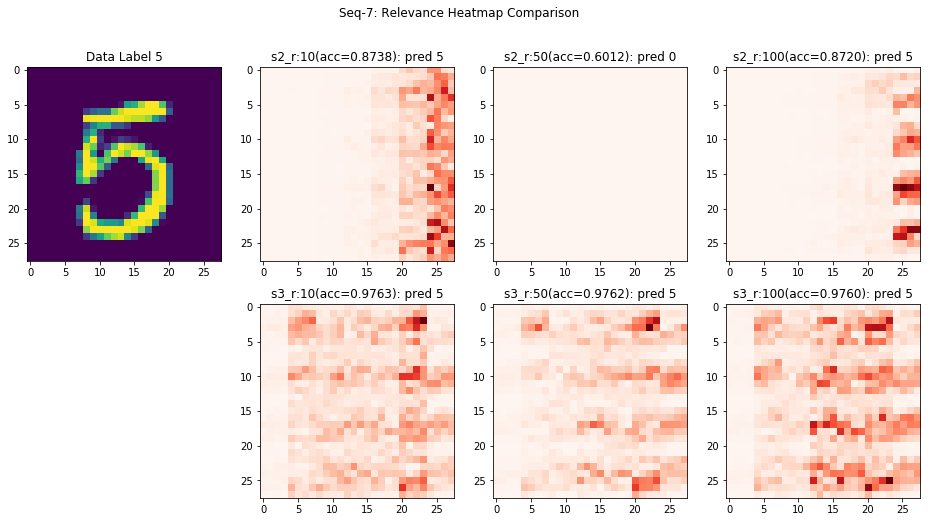

In [6]:
s2_seq_7_models = [
     ('s2_r:10', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--19-31'),
     ('s2_r:50', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--19-27'),
     ('s2_r:100', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--19-16'),
]

s3_seq_7_models = [
    ('s3_r:10', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--18-31'),
    ('s3_r:50', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--18-27'),
    ('s3_r:100', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--18-45'),
]

plot_heatmap(4420, s2_seq_7_models, s3_seq_7_models, suptitle='Seq-7: Relevance Heatmap Comparison')

2017-10-19 19:40:51,396 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.8737999796867371, architecture='hidden:100|out:10--recur:10', batch=100, column_at_a_time=4, dims=28, epoch=50, experiment_name='rnn-2017-10-19--19-31', lr=0.0025, max_seq_length=28, seq_length=7, path='../experiment-results/sprint-4/rnn-2017-10-19--19-31', architecture_name='s2_network', keep_prob=1)
2017-10-19 19:40:53,111 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.6011999845504761, architecture='hidden:100|out:10--recur:50', batch=100, column_at_a_time=4, dims=28, epoch=50, experiment_name='rnn-2017-10-19--19-27', lr=0.0025, max_seq_length=28, seq_length=7, path='../experiment-results/sprint-4/rnn-2017-10-19--19-27', architecture_name='s2_network', keep_prob=1)
2017-10-19 19:40:54,761 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.871999979019165, architecture='hidden:100|out:10--recur:100', batch=100, column_at_a_time=4, dims=28, epoch=50, experiment_name='r

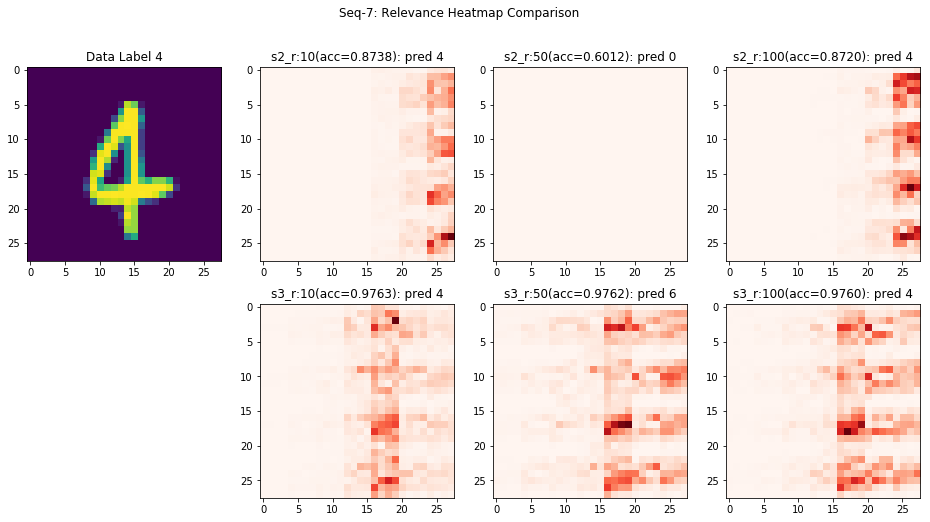

In [7]:
plot_heatmap(4751, s2_seq_7_models, s3_seq_7_models, suptitle='Seq-7: Relevance Heatmap Comparison')

## Seq Length : 14 ( 2 column )

2017-10-19 23:19:34,197 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.29339998960494995, architecture='hidden:50|out:10--recur:10', batch=100, column_at_a_time=2, dims=28, epoch=50, experiment_name='rnn-2017-10-19--20-27', lr=0.0025, max_seq_length=28, seq_length=14, path='../experiment-results/sprint-4/rnn-2017-10-19--20-27', architecture_name='s2_network', keep_prob=1)
2017-10-19 23:19:37,077 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.6146000027656555, architecture='hidden:50|out:10--recur:50', batch=100, column_at_a_time=2, dims=28, epoch=50, experiment_name='rnn-2017-10-19--20-20', lr=0.0025, max_seq_length=28, seq_length=14, path='../experiment-results/sprint-4/rnn-2017-10-19--20-20', architecture_name='s2_network', keep_prob=0.8)
2017-10-19 23:19:39,699 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.7006999850273132, architecture='hidden:50|out:10--recur:100', batch=100, column_at_a_time=2, dims=28, epoch=50, experiment_name

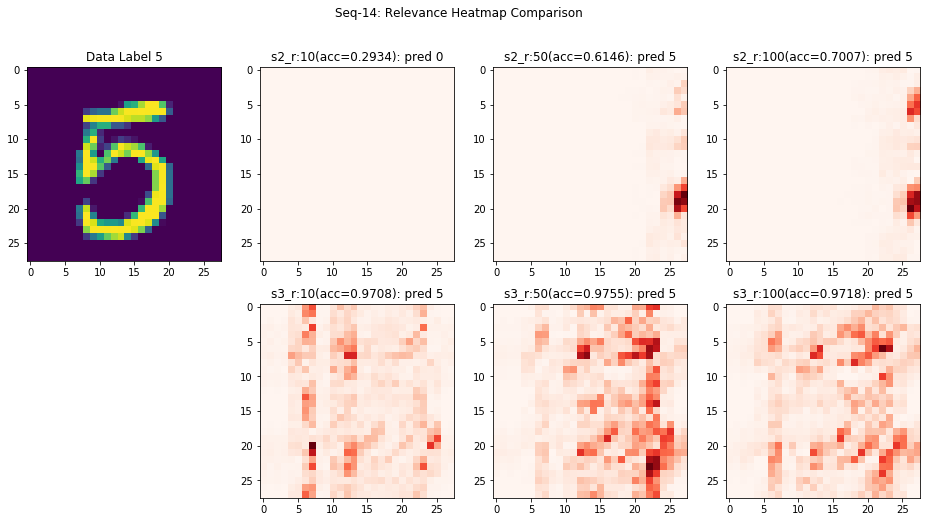

In [18]:
s2_seq_14_models = [
     ('s2_r:10', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--20-27'),
     ('s2_r:50', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--20-20'),
     ('s2_r:100', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--20-12'),
]

s3_seq_14_models = [
    ('s3_r:10', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--20-08'),
    ('s3_r:50', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--19-59'),
    ('s3_r:100', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--19-49'),
]

plot_heatmap(4420, s2_seq_14_models, s3_seq_14_models, suptitle='Seq-14: Relevance Heatmap Comparison')

2017-10-19 23:19:56,224 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.29339998960494995, architecture='hidden:50|out:10--recur:10', batch=100, column_at_a_time=2, dims=28, epoch=50, experiment_name='rnn-2017-10-19--20-27', lr=0.0025, max_seq_length=28, seq_length=14, path='../experiment-results/sprint-4/rnn-2017-10-19--20-27', architecture_name='s2_network', keep_prob=1)
2017-10-19 23:19:59,269 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.6146000027656555, architecture='hidden:50|out:10--recur:50', batch=100, column_at_a_time=2, dims=28, epoch=50, experiment_name='rnn-2017-10-19--20-20', lr=0.0025, max_seq_length=28, seq_length=14, path='../experiment-results/sprint-4/rnn-2017-10-19--20-20', architecture_name='s2_network', keep_prob=0.8)
2017-10-19 23:20:02,022 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.7006999850273132, architecture='hidden:50|out:10--recur:100', batch=100, column_at_a_time=2, dims=28, epoch=50, experiment_name

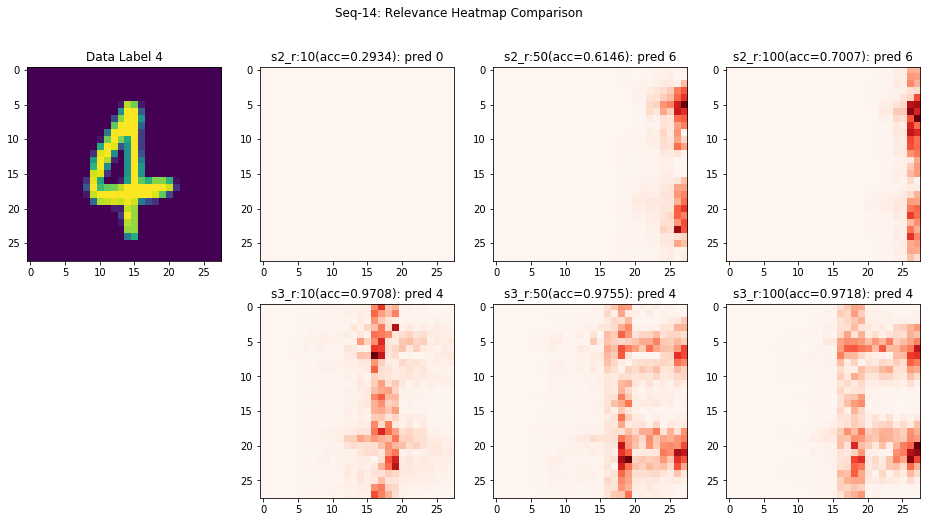

In [19]:
plot_heatmap(4751, s2_seq_14_models, s3_seq_14_models, suptitle='Seq-14: Relevance Heatmap Comparison')

## Seq length : 28 ( 1 col at a time )

2017-10-20 00:18:17,340 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.35569998621940613, architecture='hidden:150|out:10--recur:10', batch=100, column_at_a_time=1, dims=28, epoch=50, experiment_name='rnn-2017-10-19--23-10', lr=0.001, max_seq_length=28, seq_length=28, path='../experiment-results/sprint-4/rnn-2017-10-19--23-10', architecture_name='s2_network', keep_prob=1)
2017-10-20 00:18:22,582 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.5884000062942505, architecture='hidden:150|out:10--recur:50', batch=100, column_at_a_time=1, dims=28, epoch=50, experiment_name='rnn-2017-10-19--23-02', lr=0.001, max_seq_length=28, seq_length=28, path='../experiment-results/sprint-4/rnn-2017-10-19--23-02', architecture_name='s2_network', keep_prob=1)
2017-10-20 00:18:27,464 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.4700999855995178, architecture='hidden:150|out:10--recur:100', batch=100, column_at_a_time=1, dims=28, epoch=50, experiment_name=

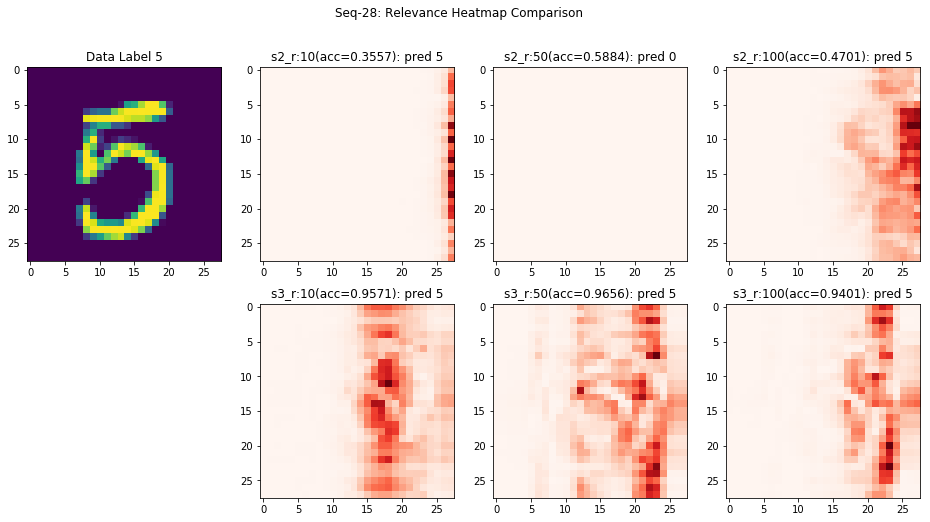

In [27]:
s2_seq_28_models = [
     ('s2_r:10', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--23-10'),
     ('s2_r:50', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--23-02'),
     ('s2_r:100', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--22-51'),
]

s3_seq_28_models = [
    ('s3_r:10', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--23-29'),
    ('s3_r:50', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--23-41'),
    ('s3_r:100', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--23-56'),
]

plot_heatmap(4420, s2_seq_28_models, s3_seq_28_models, suptitle='Seq-28: Relevance Heatmap Comparison')

2017-10-20 00:18:57,051 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.35569998621940613, architecture='hidden:150|out:10--recur:10', batch=100, column_at_a_time=1, dims=28, epoch=50, experiment_name='rnn-2017-10-19--23-10', lr=0.001, max_seq_length=28, seq_length=28, path='../experiment-results/sprint-4/rnn-2017-10-19--23-10', architecture_name='s2_network', keep_prob=1)
2017-10-20 00:19:01,944 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.5884000062942505, architecture='hidden:150|out:10--recur:50', batch=100, column_at_a_time=1, dims=28, epoch=50, experiment_name='rnn-2017-10-19--23-02', lr=0.001, max_seq_length=28, seq_length=28, path='../experiment-results/sprint-4/rnn-2017-10-19--23-02', architecture_name='s2_network', keep_prob=1)
2017-10-20 00:19:06,704 | INFO : s2_network.py(load 98) - ExperimentArtifact(accuracy=0.4700999855995178, architecture='hidden:150|out:10--recur:100', batch=100, column_at_a_time=1, dims=28, epoch=50, experiment_name=

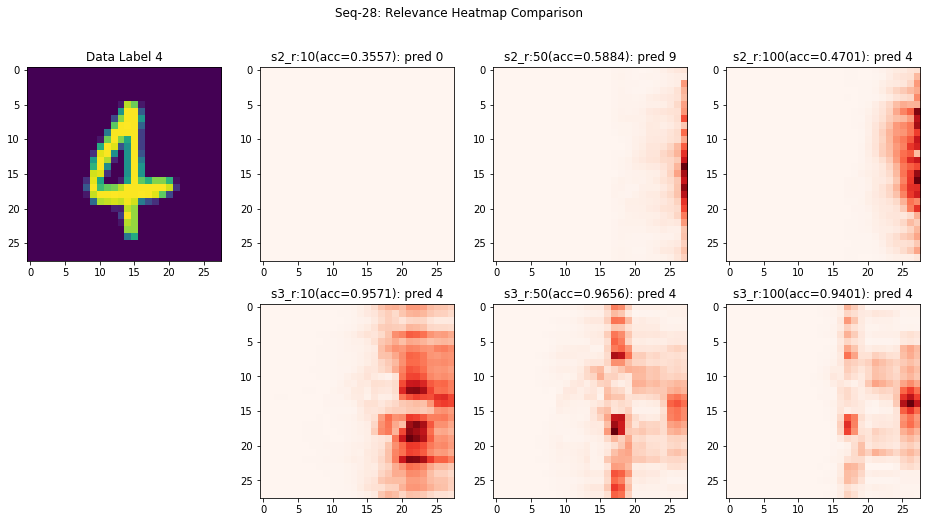

In [28]:
plot_heatmap(4751, s2_seq_28_models, s3_seq_28_models, suptitle='Seq-28: Relevance Heatmap Comparison')

# Summary